# Deep Learning: Konsep dan Aplikasi Geospasial

**Bagian 1: Memahami Pembuatan Model pada Deep Learning**

Notebook ini merupakan bagian terakhir dari serangkaian Notebook yang memuat panduan dan latihan untuk pelatihan Geospatial Data Science untuk aplikasi di bidang Geospasial. Pada bagian pertama dan kedua, kita telah melihat bagaimana perkembangan Data Science memiliki pengaruh sangat besar dalam bidang Geospasial. Demikian pula, aplikasi machine learning dalam bidang Geospasial yang mempengaruhi bagaimana analisis terhadap data spasial yang sangat banyak mampu dilakukan secara efisien.

Pada bagian ketiga ini akan dibahas secara ringkas mengenai dasar dari Deep Learning sebagai fokus khusus dalam bidang Machine Learning. Aplikasi Deep Learning dapat kita jumpai pada berbagai bidang, demikian pula pada bidang geospasial yang akan kita kerjakan sebagai latihan di akhir notebook ini. 

Penjelasan mengenai Deep Learning memerlukan pembahasan yang panjang. Notebook ini hanya akan memberikan sedikit bahasan tentang bagaimana model Deep Learning dibuat menggunakan Tensorflow dan antarmuka Keras. Pembaca disarankan untuk mencari rujukan yang lebih komprehensif mengenai Deep Learning untuk memahami konsep serta penggunaan Deep Learning untuk berbagai aplikasi.

## Pengantar

Sebagaimana Machine Learning, pembahasan Deep Learning menguat seiring dengan perkembangan isu pada Industri 4.0. Saat ini aplikasi Deep Learning telah memasuki berbagai bidang, bahkan yang kita jumpai sehari-hari.  

![](https://imgs.xkcd.com/comics/machine_learning_captcha_2x.png)

Pada Latihan ini akan diberikan dasar dari Deep Learning: Bagaimana membuat sebuah model yang dapat mempelajari sendiri pola dari suatu data.





> Sebelum membaca lebih jauh, terlebih dahulu aktifkan mode GPU pada Runtime Google Colab Anda. Hitungan Deep Learning memerlukan kemampuan komputasi maksimal yang tersedia

## Memahami Dasar Deep Learning dengan Tensorflow

Perhatikan sebuah persamaan dalam bentuk pseudocode berikut:

```
float persamaan(float x){
    float y = (3 * x) + 1;
    return y;
}
```

pada persamaan di atas, kita sebagai programmer menentukan sebuah parameter yang akan kita hitung, yaitu *x*. Dengan demikian, apabila kita memiliki nilai x, maka kita akan dapat menghitung y dengan mudah. Jika nilai x adalah 10, maka nilai y tentunya adalah 31, misalnya.

Dalam Deep Learning, kita memberikan x dan y kepada mesin, kemudian dari model yang kita bangun, mesin tersebut akan mempelajari pola yang mungkin, kemudian memberikan jawaban apabila kita berikan data yang baru. Pada bagian ini kita akan coba membuat sebuah model untuk menentukan pola dari beberapa data yang kita masukkan ke dalam model. Kita akan menggunakan Tensorflow dan Keras untuk keperluan ini.

In [1]:
# memanggil library yang diperlukan
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot

## Menyusun Model

Model adalah jaringan atau network yang kita bangun untuk mendeteksi pola berdasarkan atas bobot dan bias yang diperoleh pada saat training. Pada bagian ini kita akan membuat sebuah model Dense Neural Network yang sangat dangkal: hanya satu layer dengan satu unit neuron di dalamnya. 

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# cara penulisan lain:
## model = tf.keras.Sequential()


In [ ]:
model.add(5, input_shape=[1])

Dengan menggunakan `model.summary` kita akan dapat melihat struktur dari model yang kita susun berikut jumlah parameternya:

In [3]:
# bagaimana arsitektur dari model yang kita buat?
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Dari model di atas kita dapati ada dua parameter yang akan diadjust untuk meminimalisir error. Apa sajakah parameter ini?

## Melakukan Kompilasi dan Inisiasi Metrics

Model yang kita buat perlu dikompilasi dengan beberapa parameter tertentu, seperti hitungan untuk Loss function dan metode optimasinya. Pada kode di bawah kita akan menggunakan SGD (Stochastic Gradient Descent) sebagai optimizer untuk meminimalkan error, sementara errornya sendiri kita hitung menggunakan MSE. Kita juga sisipkan catatan untuk metrik dalam bentuk akurasi agar nantinya kita dapat melihat bagaimana proses training model ini berjalan.

In [4]:
# melakukan kompilasi model menggunakan SGD sebagai optimizer
# serta MSE sebagai ukuran error untuk bias
# tampilkan juga nilai akurasinya
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])


Selanjutnya, kita memiliki data sebagai berikut:

In [5]:
# apa kira-kira hubungan antara dua variabel ini?
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

Apabila melihat hubungan antara kedua data tersebut, kira-kira apakah Anda dapat menentukan polanya? 

Apakah komputer juga akan dapat mengenalinya? kita coba lakukan fitting model yang sudah kita buat pada data tersebut, kemudian menampilkan akurasi pada tiap epoknya.

In [7]:
history = model.fit(xs, ys, epochs=50)
history

Epoch 1/50
1/1 [==============================] - 0s 5ms/step - loss: 13.1881 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 10.3779 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 8.1669 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 6.4274 - accuracy: 0.1667
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 5.0587 - accuracy: 0.1667
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 3.9819 - accuracy: 0.1667
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 3.1347 - accuracy: 0.1667
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 2.4681 - accuracy: 0.1667
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 1.9436 - accuracy: 0.1667
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 1.5309 - accuracy: 0.1667
Epoch 11/50
1/1 [========

## Menampilkan Evaluasi Data

Dari contoh fitting di atas kita dapat melihat bagaimana nilai akurasi dan loss saling berinteraksi. Untuk tiap epok yang berjalan terjadi perubahan nilai akurasi dan loss, dimana nilai Loss untuk tiap epok menjadi semakin kecil. Kita dapat tampilkan polanya sebagai berikut:

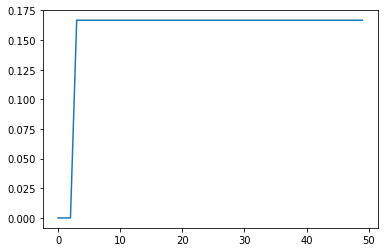

In [9]:
pyplot.plot(history.history['accuracy'])
pyplot.show()

Dan terakhir, kita coba pada data baru yang belum pernah dilihat oleh model ini sebelumnya. Apakah nilainya sesuai dengan perkiraan Anda?

In [10]:
# berapa kira2 nilai Y jika X adalah 10?
print(model.predict([10.0]))

[[31.146484]]


Pada contoh di atas, kita telah melihat bagaimana Deep Learning digunakan untuk membuat 'rule' atau aturan agar dapat belajar mengenai pola yang kita inginkan dari data yang ada. Tentunya, model yang digunakan dalam deep learning memerlukan data yang lebih banyak lagi agar lebih akurat. Selanjutnya, kerjakan latihan di bawah ini untuk memahamkan mengenai materi ini.

## Latihan

Kerjakan Soal dan Latihan berikut:

1. Buatlah pasangan set data baru sejumlah 10 data x dan y dengan pola tertentu, kemudian buat model baru untuk memprediksi keluaran dari nilai masukan yang berbeda. Berapa akurasi model? Apakah model dapat memprediksi dengan benar?

2. Lakukan perubahan pada jumlah epok. Apa yang terjadi pada tingkat akurasi dan loss-nya?

2. Pada contoh di atas kita menggunakan satu layer dengan kedalaman (unit) berupa satu neuron. Apa yang terjadi jika Anda menambahkan Layer dan kedalaman neuronnya? apakah akurasinya semakin baik?

## Rujukan

* https://www.youtube.com/watch?v=aircAruvnKk
* https://www.tensorflow.org/tutorials/